In [153]:
import pandas as pd
import numpy as np
from math import *
import random
import matplotlib.pyplot as plt
from random import shuffle
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split

In [130]:
load_data = pd.read_excel("/content/Load Data in kW.xlsx",header = None)
load_data.head()

,0
0,5551.82208
1,4983.17184
2,4888.39680
3,5072.95872
4,5196.25980


In [131]:
load_data.describe()

,0
count,2184.000000
mean,6393.230623
std,17139.102597
min,3377.919600
25%,5258.767680
50%,5935.910400
75%,6738.692400
max,805444.430400


In [132]:
load_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2184 entries, 0 to 2183
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2184 non-null   float64
dtypes: float64(1)
memory usage: 17.2 KB


{'boxes': [<matplotlib.lines.Line2D at 0x7f4ca5cc45d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f4ca5884a10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f4ca58a04d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f4ca58a0c10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f4ca584eb50>,
  <matplotlib.lines.Line2D at 0x7f4ca5950a10>]}

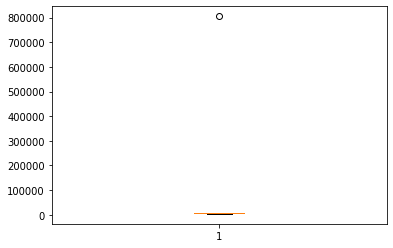

In [133]:
plt.boxplot(load_data.iloc[:,0])

In [134]:
from scipy import stats

z = np.abs(stats.zscore(load_data.iloc[:,0]))

threshold = 3
print(np.where(z > 3))

(array([929]),)


In [135]:
load_data.iloc[929,0] = load_data.iloc[928,0]

{'boxes': [<matplotlib.lines.Line2D at 0x7f4ca5b78210>],
 'caps': [<matplotlib.lines.Line2D at 0x7f4ca5aff7d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f4ca5ba8f90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f4ca5b6bad0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f4ca5aff110>,
  <matplotlib.lines.Line2D at 0x7f4ca5aff0d0>]}

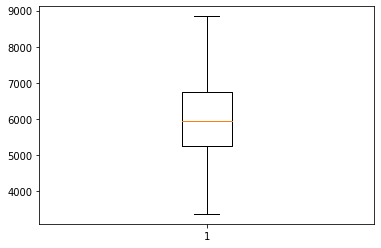

In [136]:
plt.boxplot(load_data.iloc[:,0])

In [137]:
data = minmax_scale(load_data.iloc[:,0])
print(data)

[0.39787738 0.29380046 0.27645431 ... 0.24629825 0.32438447 0.65165045]


In [138]:
x = []
y = []
for i in range(1,len(data)-24):
  temp = [data[i],data[i+23]]
  x.append(temp)
  y.append(data[i+24])

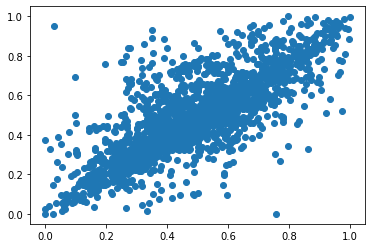

In [139]:
x = np.array(x)
y = np.array(y)

plt.scatter(x[:,[1]],y)

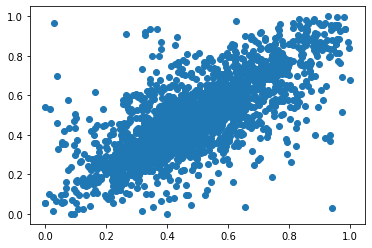

In [140]:
plt.scatter(x[:,[0]],y)

In [127]:
print(x[[1][0]][0])
print(x[[1][0]][1])
print(y[[1]][0])

print(x)
print(y)

0.2764543094348234
0.25579869333257255
0.24450087016062294
[[0.29380046 0.28430002]
 [0.27645431 0.25579869]
 [0.31023366 0.24450087]
 ...
 [0.68414596 0.21779692]
 [0.51467861 0.24629825]
 [0.41730621 0.32438447]]
[0.25579869 0.24450087 0.23996462 ... 0.24629825 0.32438447 0.65165045]


In [141]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

1727
1727
432
432


In [154]:
def gradientm0(y,x0,x1,m0,m1,c):
    return -1*(y-m0*x0-m1*x1-c)*x0

def gradientm1(y,x0,x1,m0,m1,c):
    return -1*(y-m0*x0-m1*x1-c)*x1

def gradientc(y,x0,x1,m0,m1,c):
    return -1*(y-m0*x0-m1*x1-c)

def error(x,y,m0,m1,c):
  number_of_samples = len(x)
  sum = 0
  for i in range(number_of_samples):
    sum = sum + math.pow((y[[i]][0] - m0*x[[i][0]][0] - m1*x[[i][0]][1] - c), 2)
  error_value = 1*0.5*(1/number_of_samples)*sum
  return error_value

In [163]:
learning_rate = 0.01
epochs = 50

m0 = 1
m1 = 1
c = 1

Gm0 = 0
Gm1 = 0
Gc = 0
e = pow(10,-6)
number_of_samples = len(x_train)
error_list = []

In [164]:
for i in range(epochs):
    for j in range(number_of_samples):
        gradient_m0 = gradientm0(y_train[[j]][0],x_train[[j][0]][0],x_train[[i][0]][1],m0,m1,c)
        gradient_m1 = gradientm1(y_train[[j]][0],x_train[[j][0]][0],x_train[[i][0]][1],m0,m1,c)
        gradient_c = gradientc(y_train[[j]][0],x_train[[j][0]][0],x_train[[i][0]][1],m0,m1,c)

        Gm0 = Gm0 + gradient_m0**2
        Gm1 = Gm1 + gradient_m1**2
        Gc = Gc + gradient_c**2

        learning_rate_m0 = learning_rate/sqrt(Gm0+e)
        learning_rate_m1 = learning_rate/sqrt(Gm1+e)
        learning_rate_c = learning_rate/sqrt(Gc+e)
        
        deltam0 = -1*learning_rate_m0*gradient_m0
        deltam1 = -1*learning_rate_m1*gradient_m1
        deltac = -1*learning_rate_c*gradient_c
        
        m0 = m0 + deltam0
        m1 = m1 + deltam1
        c = c + deltac
    err = error(x,y,m0,m1,c)
    print(err)
    error_list.append(err)

0.057660250592259155
0.012508236869621988
0.0083857026524953
0.00974970998250924
0.008702845265860468
0.008718168747756199
0.008348021488336063
0.008392343850106536
0.008282267666086517
0.00826920079817202
0.009164264986721498
0.008407124787024366
0.008311049672348046
0.008258489161685104
0.008561877524013706
0.00833440890278973
0.008307122509779554
0.008389476735555181
0.008980739645385812
0.008966714022870007
0.00849272691185148
0.008411083004366928
0.008454123097239972
0.008371923444267158
0.008354939216184326
0.008350746638163521
0.008378632296409368
0.008473334456582587
0.00849018912044544
0.008425602931807752
0.00837803262582021
0.008353277562379356
0.00838366027615933
0.008425748036916036
0.008423677114108895
0.008410737868625794
0.00844746123759279
0.008420749363645254
0.008449081686370475
0.008419330346247826
0.008413311355809208
0.008483911392967993
0.008456306962014723
0.008554371117085988
0.008490422917054577
0.008475267656809175
0.008464499202955332
0.008478603970684105
0.

Text(0.5, 1.0, 'error graph in case of SGD with AdaGrad')

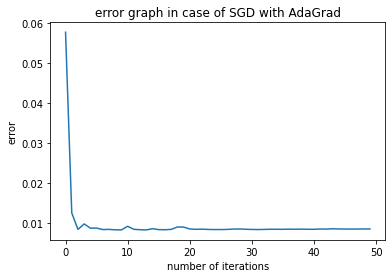

In [165]:
x1 = range(epochs)
y1 = error_list

plt.plot(x1,y1)
plt.xlabel("number of iterations")
plt.ylabel("error")
plt.title("error graph in case of SGD with AdaGrad")

In [166]:
print(m0,m1,c)

0.6071261566111777 0.030934676604183232 0.17468884359953782


In [171]:
train_error = error(x_train,y_train,m0,m1,c)
test_error = error(x_test,y_test,m0,m1,c)

print("train error : ",train_error)
print("test error : ",test_error)

train error :  0.008880806551387807
test error :  0.006988437925398206


In [169]:
input_load0 = float(input("enter yesterday load at this time : "))
input_load1 = float(input("enter load at previous hour : "))

max_value = 8841.669480
min_value = 3377.919600

input_load0 = (input_load0 - min_value)/(max_value-min_value)
input_load1 = (input_load1 - min_value)/(max_value-min_value)
output_load = input_load0*m0 + input_load1*m0 + c

output_load = output_load*(max_value-min_value)+min_value

print("predicted load for this hour is : ",output_load)

enter yesterday load at this time : 3000
enter load at previous hour : 2000
predicted load for this hour is :  3266.3598431310684
